# Simulate Bernoulli Distribution from Sample
Using Julia, fit a data sample to a Bernoulli distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. A Bernoulli distribution is parameterized by a success rate p, which takes value 1 with probability p and 0 with probability 1-p.

## 0. Import packages and define SimulateBinomialDistributionFromSample function
Install (if necessary) and import the functions necessary to run the SimulateBinomialDistributionFromSample function. Then define the function for later use. 

In [1]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateBinomialDistributionFromSample(
    dataframe::DataFrame,
    column_name::String,
    sample_size_per_trial::Integer=1,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    prob = mean(dataframe[:, column_name])
    Param_BinomialDistSim = fit(Binomial, sample_size_per_trial, dataframe[:, column_name])
    println("Sample size (n) per trial used in simulation: ", Param_BinomialDistSim.n)
    println("Probability of success (p) used in simulation: ", Param_BinomialDistSim.p)
    # Conduct simulation
    Arr_BinomialDistSim = rand(Param_BinomialDistSim, trials, 1)
    DF_BinomialDistSim = DataFrame(Arr_BinomialDistSim, :auto)
    # Group and summarize by outcomes
    GDF_BinomialDistSim = groupby(DF_BinomialDistSim, "x1")
    GDF_BinomialDistSim = combine(GDF_BinomialDistSim, nrow)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_BinomialDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Binomial Distribution: " * column_name
        p = bar(
            x= GDF_BinomialDistSim[:, "x1"], 
            y= GDF_BinomialDistSim[:, "nrow"],
            fillalpha= 0.4, 
            label= "Simulated Outcomes", 
            title= title_for_plot, 
            xlabel= column_name
        )
        plot!(kde_sample.x, kde_sample.density .* length(DF_BinomialDistSim[:, "x1"]) .* 0.55, linewidth = 3, color = 2, label="Density of Sample")
        plot!(kde_simulation.x, kde_simulation.density .* length(DF_BinomialDistSim[:, "x1"]) .* 0.2, linewidth = 3, color = 1, label="Density of Simulation")
        display(p)
    end
    # Return simulation results
    return DF_BinomialDistSim
end

SimulateBinomialDistributionFromSample (generic function with 4 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [2]:
Arr_RandomNumbers = rand(0:1, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

,x1
,Int64
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,0


## 2. Use the SimulateBinomialDistributionFromSample function
Use the SimulateBinomialDistributionFromSample function to simulate a Binomial distribution from your sample dataset.

Sample size (n) per trial used in simulation: 1
Probability of success (p) used in simulation: 0.36


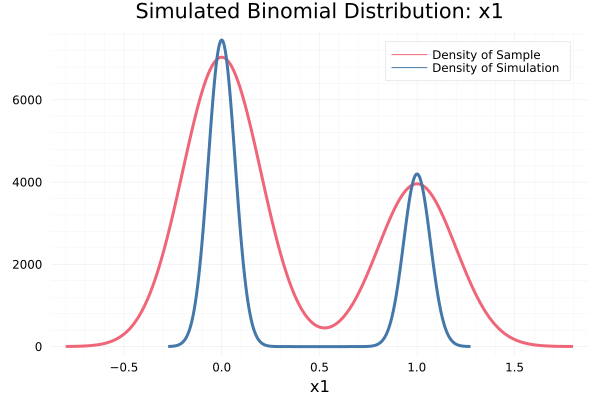

,x1
,Int64
1,1
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,1


In [3]:
DF_Sim = SimulateBinomialDistributionFromSample(DF_RandomNumbers, "x1")